<a href="https://colab.research.google.com/github/jdeiros/soa-2020/blob/master/HPC/Deiros_Jeronimo_ejercicio_2_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introducción
El siguiente ejemplo modifica el color de una imágen parametrizada, aplicando un filtro Sepia. El cálculo de la escala se realiza convirtiendo los 3 canales RGB, que representan a los colores R (rojo)-G(verde)-B(azul), de cada pixel.
Se utilizó el siguiente calculo para obtener los valores de cada color.
tr = 0.393R + 0.769G + 0.189B
tg = 0.349R + 0.686G + 0.168B
tb = 0.272R + 0.534G + 0.131B
donde tr, tg, y tb son los valores nuevos de cada color.

EL objetivo es aprender el funcionamiento del Lenguaje Python, CUDA y el manejo de imagenes a bajo nivel. El ejemplo es ilustrativo, ya que internamente el módulo Pillow posee varios filtros integrados.

#2. Armado del ambiente
Toma la direccion web de una imagen con acceso público en internet, la deja disponible al contexto de ejecucion del cuaderno colab.

In [ ]:

#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/jdeiros/soa-2020/blob/master/HPC/img/img_planetario.jpg?raw=true" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://github.com/wvaliente/SOA_HPC/blob/main/unlam.jpg?raw=true -O imagen.jpg

# TODO: Mejorar información y resultado de ejecución. 
!wget {url_imagen} -O imagen.jpg

--2020-11-21 21:20:41--  https://github.com/jdeiros/soa-2020/blob/master/HPC/img/img_planetario.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jdeiros/soa-2020/raw/master/HPC/img/img_planetario.jpg [following]
--2020-11-21 21:20:41--  https://github.com/jdeiros/soa-2020/raw/master/HPC/img/img_planetario.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jdeiros/soa-2020/master/HPC/img/img_planetario.jpg [following]
--2020-11-21 21:20:41--  https://raw.githubusercontent.com/jdeiros/soa-2020/master/HPC/img/img_planetario.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... con

#3. Desarrollo
Ejecución del algoritmo filtro sepia en GPU.

Imagen del filtro: imagen.jpg -RGB- [443, 742]
Tiempo de conversión de imagen: 8631.658 [ms]
Tiempo Total: 8735.037 [ms]


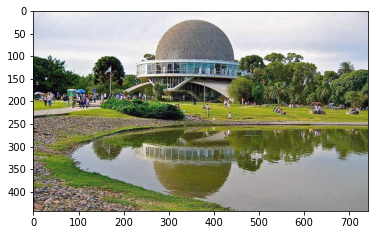

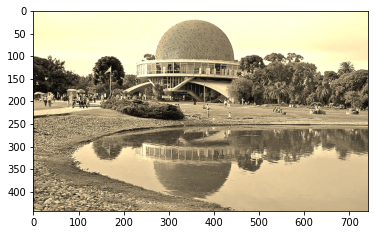

In [ ]:
%matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------


img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# Optengo las proporsiones de la imagen. 
img_alto, img_ancho = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img_pic_cpu = numpy.asarray(image)

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR_cpu = numpy.empty_like( img_pic_cpu)

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

plt.figure()
imgplot=plt.imshow( img_pic_cpu )

tiempo_img = datetime.now()

# Convierto la imagen aplicando el filtro sepia
for y  in range( 0, img_alto ):
  for x in range( 0, img_ancho ):
#    print( x, y, img_pic_cpu[x][y] )
    pixel_R, pixel_G, pixel_B = img_pic_cpu[x][y]
    tr = pixel_R * 0.393 + pixel_G * 0.769 + pixel_B * 0.189
    tg = pixel_R * 0.349 + pixel_G * 0.686 + pixel_B * 0.168
    tb = pixel_R * 0.272 + pixel_G * 0.534 + pixel_B * 0.131
    
    if tr > 255:
      r = 255 
    else:
      r = tr
    if tg > 255:
      g = 255 
    else:
      g = tg
    if tb > 255:
      b = 255 
    else:
      b = tb

    img_picR_cpu[x][y] = [r, g, b]

tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( img_picR_cpu )

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )

#4. Tabla de pasos

Paso | Procesador | Funcion | Detalle
------------ | ------------ | ------------- | -------------
1 | CPU | @param | Lectura de la dirección URL de la imagen (jpg) a procesar.
2 | CPU | import | Importa los módulos para funcionar.
3 | CPU | datetime.now() | Toma el tiempo actual.
4 | CPU | Image.open() | Abre el archivo de la imagen.
5 | CPU | numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
6 | CPU | numpy.empty_like() | Genera el array destino, que tendrá a la imagen resultado
7 | CPU | 	print() | Informa los atributos de la imagen.
8 | CPU | plt.imshow | Muestra la imagen original.
9 | CPU | for...for.. | Convierte la imagen aplicando filtro sepia.
10 | CPU | plt.imshow	 | Muestra la imagen resultado.
11 | CPU | print | informo tiempos de ejecución.

#5. Conclusiones
* ### 5.1 Medidas
##### **Medidas de prestaciones en algoritmos paralelos**
Las tecnicas de HPC buscan reducir los tiempos de ejecución, el tiempo como medida, no alcanza. Dos algoritmos pueden ejecutar en el mismo tiempo, pero uno de ellos usa menos procesadores [4,5].
##### **SpeedUp**
Referencia a la ganacia de velocidad que se consigue con un algoritmo paralelo, al resolver el mismo problema con respecto al algoritmo secuencial.
##### **Eficiencia**
La eficiencia normaliza el valor del SpeedUp, al dividirlo por la cantidad de procesadores que se utilizaron para alcanzar la ganacia en velocidad. Dando la idea de la porción de tiempo que los procesadores se dedican al trabajo útil.
##### **Coste**
El coste de un algoritmo paralelo representa el tiempo realizado por todo el sistema en la resoluciòn del problema.
##### **Función Overhead**
Es la diferencia entre el Coste y el tiempo secuencial. Mientras mayor es la función overhead, peor es el comportamiento del algoritmo paralelo.

* ### 5.2 Breve repaso de los puntos mas relevantes del trabajo.


* ### 5.3 Explicación sobre las lecciones aprendidas que deja el ejercicio.

* ### 5.4 Sugerencias para continuar con el ejercicio (funcionalidad o algoritmo).



#6. Bibliografía

* [1] Como Programar en C C++ y Java 4ta Edición Harvey M. Deitel & Paul J. Deitel.
* [2] Python Básico - SOA UNLaM: [Python Básico](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb)
* [3] Tutorial Point Colab: [Google Colab Tutorial](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/google_colab_tutorial.pdf)
